In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/multiscale_entropy/calculated_entropy/sample_data.csv',header=None)

In [4]:
import numpy as np
df=df.T.fillna(df.mean(axis=1)).T


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
1137,0.109580,0.090079,0.062708,0.093248,0.081632,0.088327,0.082031,0.084725,0.078918,0.077359,...,0.56950,0.57566,0.69088,0.48157,0.008076,0.51027,0.49566,0.54624,0.54861,2.0
1138,0.159650,0.141300,0.107250,0.156130,0.132180,0.153000,0.121280,0.155300,0.131870,0.140000,...,1.06490,1.07800,1.21010,0.92089,-0.000160,0.97223,0.94292,1.03780,1.04130,2.0
1139,0.065303,0.064110,0.038200,0.081284,0.072486,0.071292,0.068224,0.068915,0.043045,0.066232,...,1.05640,0.93723,1.11590,0.94461,0.001830,1.02620,0.92356,0.90059,1.08270,2.0
1140,0.147030,0.139340,0.103600,0.152820,0.122810,0.137480,0.120050,0.128500,0.127180,0.128570,...,0.55987,0.61913,0.65168,0.53044,-0.000160,0.52597,0.52211,0.58614,0.54931,2.0
1141,0.145730,0.124010,0.059466,0.110360,0.139690,0.088056,0.139570,0.140840,0.102890,0.100020,...,1.17580,1.03940,1.11130,0.94334,-0.000160,0.94318,0.95641,0.94484,0.99452,2.0


In [6]:

cols_to_scale = list(df.columns)[:-1]
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [6]:
df.shape

(1142, 191)

In [7]:
X = df.drop([df.shape[1]-1], axis=1)
y = df[df.shape[1]-1].values

In [8]:
X.shape

(1142, 190)

In [9]:
y.shape

(1142,)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,logreg.predict(X_test)))

0.9170305676855895
              precision    recall  f1-score   support

         1.0       0.88      0.95      0.92       109
         2.0       0.95      0.88      0.92       120

    accuracy                           0.92       229
   macro avg       0.92      0.92      0.92       229
weighted avg       0.92      0.92      0.92       229



svm

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9344978165938864

In [14]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       109
         2.0       0.96      0.92      0.94       120

    accuracy                           0.93       229
   macro avg       0.93      0.94      0.93       229
weighted avg       0.94      0.93      0.93       229



# New Section

In [15]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''


et = ExtraTreesClassifier(n_jobs = -1, random_state = seed)
ab = AdaBoostClassifier(random_state = seed)
gb = GradientBoostingClassifier(random_state = seed)
xgb = XGBClassifier(random_state = seed, n_jobs = -1)
lgb = LGBMClassifier(random_state = seed, n_jobs = -1)

knn = KNeighborsClassifier(3)
lsvm = SVC(kernel="linear", C=0.025)
rsvm = SVC(kernel="rbf",gamma=2, C=1)
gps = GaussianProcessClassifier(1.0 * RBF(1.0))
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
mlp = MLPClassifier(alpha=1, max_iter=1000)
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

In [16]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    return model.score(X_test,Y_test)
'''Calculate train_test_split score of differnt models and plot them.'''
models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
train_test_split_res = []
for model in models:
    train_test_split_res.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_res, columns = ['Train_Test_SCORE'])
train_test_score.index = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']
train_test_score = train_test_score.round(5)
train_test_score

,Train_Test_SCORE
ET,0.94752
AB,0.92128
GB,0.91837
XGB,0.94169
LGB,0.95335
KNN,0.91545
LSVM,0.87755
RSVM,0.56851
GPS,0.56851
DT,0.80466


In [17]:
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    score = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = 'accuracy')
    return score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (ACC)'])
x_val_score.index = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']

In [18]:
x_val_score

,Cross Validation Scores (ACC)
ET,0.813722
AB,0.768894
GB,0.784645
XGB,0.798665
LGB,0.819664
KNN,0.790923
LSVM,0.752189
RSVM,0.548162
GPS,0.548162
DT,0.715461


In [19]:
'''Create a function to plot learning curves.'''
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'accuracy', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

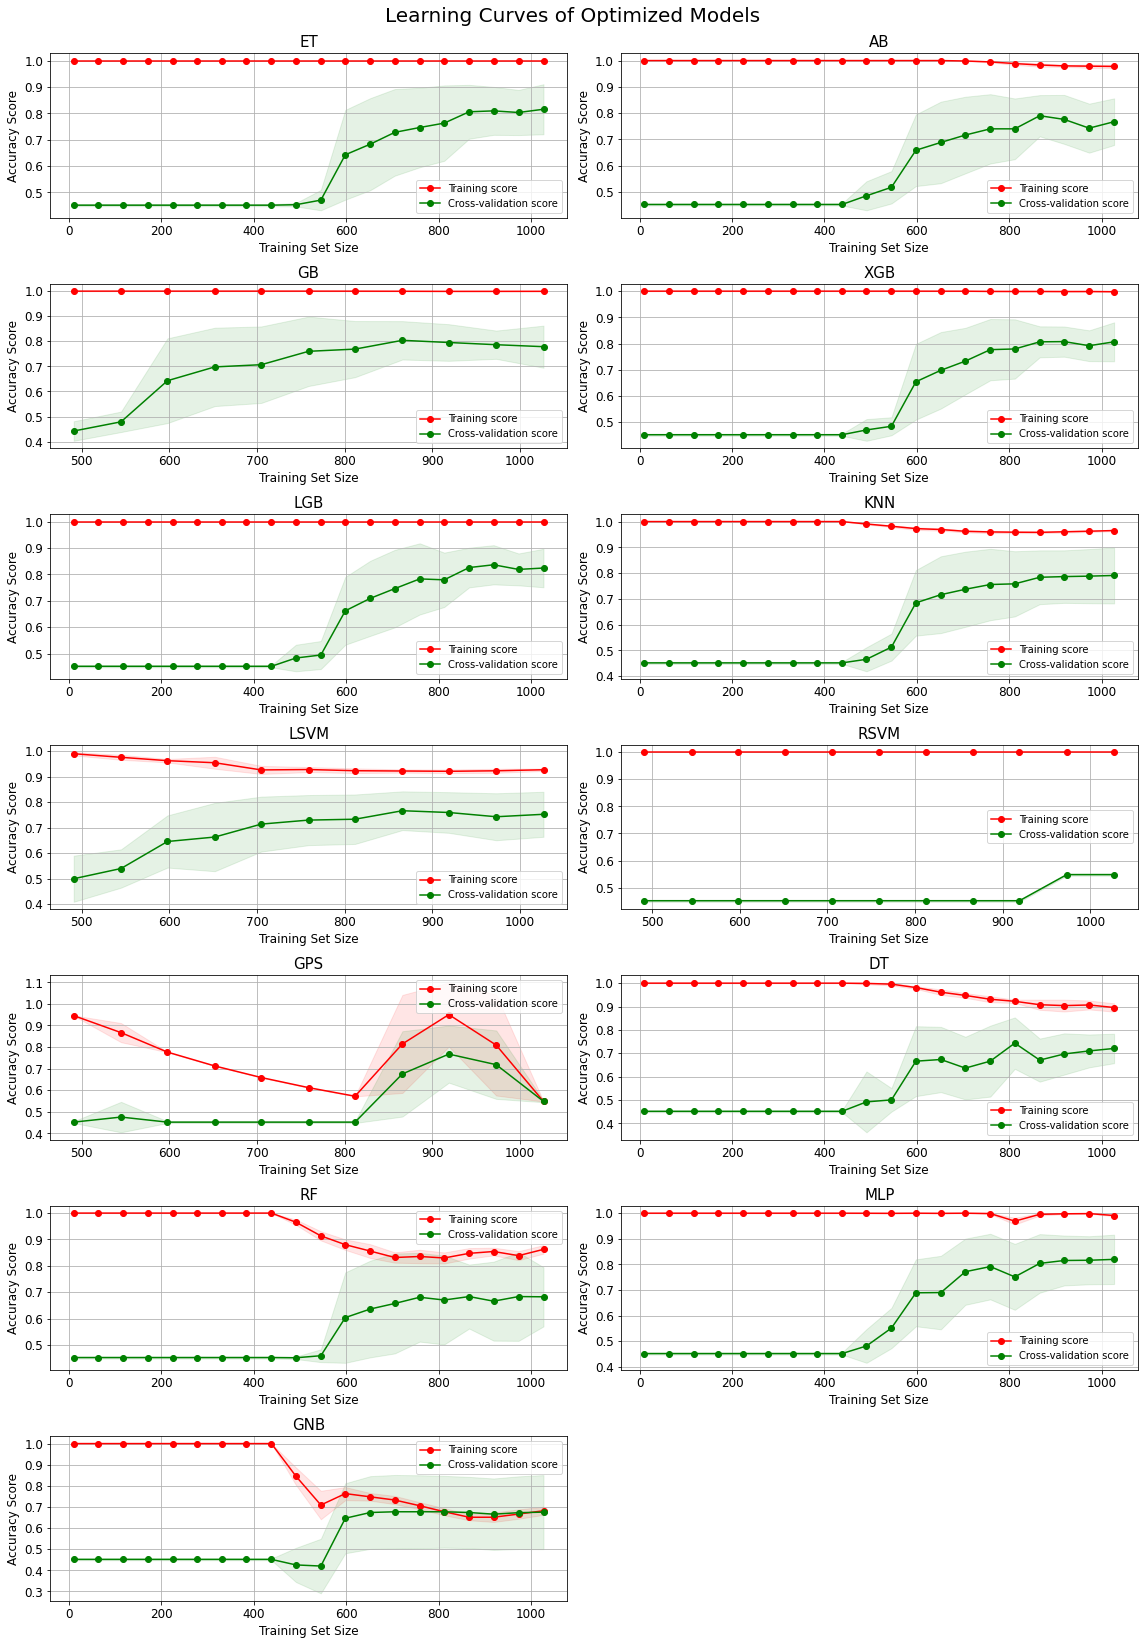

In [20]:
'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,24))
lc_models = [et,ab,gb,xgb,lgb,knn,lsvm,rsvm,gps,dt,rf,mlp,gnb,qda]
lc_labels = ['ET', 'AB', 'GB', 'XGB', 'LGB', 'KNN', 'LSVM', 'RSVM', 'GPS', 'DT', 'RF', 'MLP', 'GNB', 'QDA']

for ax, models, labels in zip (range(1,14), lc_models, lc_labels):
    try:
        plt.subplot(7,2,ax)
        plot_learning_curve(models)
        plt.title(labels, fontsize = 15)
    except:
        pass
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

# XGB

In [21]:
import xgboost as xgb
# read in data
'''
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]
# specify parameters via map
param = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.01,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'eval_metric':'auc',
         'skip_drop': 0.5}
num_round = 500
bst = xgb.train(param, dtrain, num_round,evallist)
preds = bst.predict(dtest)
'''

"\ndtrain = xgb.DMatrix(X_train,y_train)\ndtest = xgb.DMatrix(X_test,y_test)\nevallist = [(dtest, 'eval'), (dtrain, 'train')]\n# specify parameters via map\nparam = {'booster': 'dart',\n         'max_depth': 5, 'learning_rate': 0.01,\n         'objective': 'binary:logistic',\n         'sample_type': 'uniform',\n         'normalize_type': 'tree',\n         'rate_drop': 0.1,\n         'eval_metric':'auc',\n         'skip_drop': 0.5}\nnum_round = 500\nbst = xgb.train(param, dtrain, num_round,evallist)\npreds = bst.predict(dtest)\n"

In [22]:
#xgb.plot_importance(bst)

In [23]:
param = {'booster': 'dart',
         'max_depth': 5,
         'learning_rate': 0.001,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5,
         'n_estimators':2000}

[0]	validation_0-logloss:0.692512	validation_0-auc:0.94775	validation_1-logloss:0.69257	validation_1-auc:0.915979
[1]	validation_0-logloss:0.691873	validation_0-auc:0.947837	validation_1-logloss:0.691991	validation_1-auc:0.916858
[2]	validation_0-logloss:0.691873	validation_0-auc:0.947837	validation_1-logloss:0.691412	validation_1-auc:0.916858
[3]	validation_0-logloss:0.690609	validation_0-auc:0.947672	validation_1-logloss:0.690839	validation_1-auc:0.916858
[4]	validation_0-logloss:0.690609	validation_0-auc:0.947199	validation_1-logloss:0.690839	validation_1-auc:0.916858
[5]	validation_0-logloss:0.689345	validation_0-auc:0.947672	validation_1-logloss:0.689693	validation_1-auc:0.916858
[6]	validation_0-logloss:0.688716	validation_0-auc:0.947672	validation_1-logloss:0.690266	validation_1-auc:0.916858
[7]	validation_0-logloss:0.688088	validation_0-auc:0.947672	validation_1-logloss:0.688551	validation_1-auc:0.916858
[8]	validation_0-logloss:0.688089	validation_0-auc:0.947672	validation_1-l

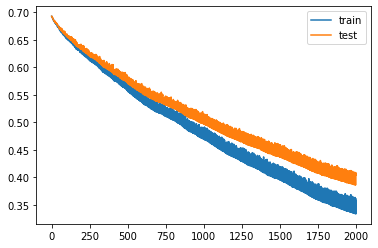

In [24]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier(**param)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric=['logloss','auc'], eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

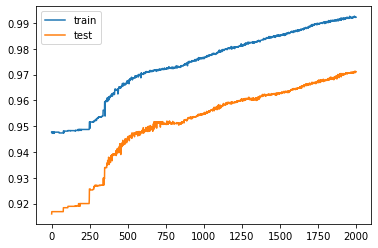

In [25]:
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.87      0.90      0.88       109
         2.0       0.91      0.88      0.89       120

    accuracy                           0.89       229
   macro avg       0.89      0.89      0.89       229
weighted avg       0.89      0.89      0.89       229



In [27]:
print(confusion_matrix(y_test,model.predict(X_test)))

[[ 98  11]
 [ 15 105]]


# Lazy

In [28]:
!pip install lazypredict


     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 20.0 MB/s 
     |████████████████████████████████| 72 kB 902 kB/s 
     |████████████████████████████████| 269 kB 45.8 MB/s 
     |████████████████████████████████| 248 kB 53.6 MB/s 
     |████████████████████████████████| 14.5 MB 32.2 MB/s 
     |████████████████████████████████| 302 kB 69.3 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 127.6 MB 24 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=c49989619c36574d6f37334e8022f6b02ffb0df4251b5dec3d78337798f25abb
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully u

In [11]:
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric =None)
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

100%|██████████| 29/29 [00:13<00:00,  2.11it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
LGBMClassifier                     0.96               0.96     0.96      0.96   
XGBClassifier                      0.95               0.95     0.95      0.95   
RandomForestClassifier             0.95               0.95     0.95      0.95   
LinearSVC                          0.92               0.92     0.92      0.92   
LogisticRegression                 0.92               0.92     0.92      0.92   
CalibratedClassifierCV             0.92               0.92     0.92      0.92   
AdaBoostClassifier                 0.91               0.91     0.91      0.91   
KNeighborsClassifier               0.91               0.91     0.91      0.91   
QuadraticDiscriminantAnalysis      0.91               0.91     0.91      0.91   
Perceptron                  

In [12]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.57
LGBMClassifier,0.96,0.96,0.96,0.96,2.52
XGBClassifier,0.95,0.95,0.95,0.95,1.29
RandomForestClassifier,0.95,0.95,0.95,0.95,1.00
LinearSVC,0.92,0.92,0.92,0.92,0.75
LogisticRegression,0.92,0.92,0.92,0.92,0.35
CalibratedClassifierCV,0.92,0.92,0.92,0.92,1.20
AdaBoostClassifier,0.91,0.91,0.91,0.91,1.90
KNeighborsClassifier,0.91,0.91,0.91,0.91,0.17
